In [2]:
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from lxml import etree
from IPython.display import Image
from PIL import Image as img
from matplotlib.patches import Rectangle
from random import randint
%matplotlib inline

In [3]:
path_images = '../src/data/raw/images/images'
path_labels = '../src/data/raw/label/label'
classes = os.listdir(path_images)
print(classes)

['crease', 'crescent_gap', 'inclusion', 'oil_spot', 'punching_hole', 'rolled_pit', 'silk_spot', 'waist folding', 'water_spot', 'welding_line']


In [4]:
Image(url= "https://storage.googleapis.com/kaggle-datasets-images/729820/1267148/5900f6392769c25da1794909f0596447/dataset-card.jpg")

In [5]:
#Количество фото
image_path = glob.glob(path_images + '/*/*.jpg')
print(len(image_path))
print(image_path[0])

2306
../src/data/raw/images/images\crease\img_01_3436789500_00004.jpg


In [6]:
#Количество разметки
xmls_path = glob.glob(path_labels+'/*.xml')
print(len(xmls_path))
print(xmls_path[0])

2280
../src/data/raw/label/label\img_01_3402617700_00001.xml


In [7]:
#Распределение по классам
class_distr= {}
for val in classes:
    class_distr[val] = len(glob.glob(path_images+f'/{val}/*.jpg'))

In [8]:
print(class_distr)

{'crease': 52, 'crescent_gap': 226, 'inclusion': 216, 'oil_spot': 204, 'punching_hole': 219, 'rolled_pit': 31, 'silk_spot': 650, 'waist folding': 146, 'water_spot': 289, 'welding_line': 273}


In [9]:
class_table = pd.DataFrame.from_dict(data=class_distr, orient='index', columns = ['Amount'])
class_table = class_table.sort_values('Amount')
class_table.loc['Total'] = class_table.sum(axis=0)

In [10]:
class_table

,Amount
rolled_pit,31
crease,52
waist folding,146
oil_spot,204
inclusion,216
punching_hole,219
crescent_gap,226
welding_line,273
water_spot,289
silk_spot,650


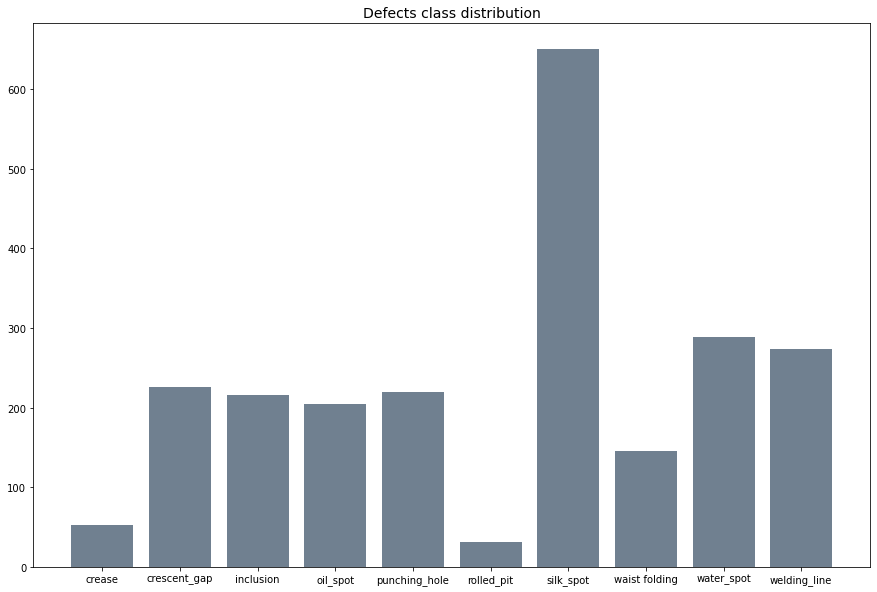

In [11]:
values = list(class_distr.values())
labels = list(class_distr.keys())

plt.figure(figsize=(15,10))
plt.bar( labels, values, color='slategray')
plt.title('Defects class distribution', fontdict={'fontsize':14})
plt.show()

In [12]:
xmls_path.sort(key = lambda x:x.split("\\")[-1].split(".xml")[0])
image_path.sort(key = lambda x:x.split("\\")[-1].split(".jpg")[0])

In [13]:
xmls_train = [path.split("\\")[-1].split(".")[0] for path in xmls_path]
xmls_train[:5]

['img_01_3402617700_00001',
 'img_01_3402617700_01009',
 'img_01_3436789500_00004',
 'img_01_3436814600_00259',
 'img_01_3436815300_00473']

In [14]:
images_train = [img for img in image_path if (img.split("\\")[-1].split)(".jpg")[0] in xmls_train]
images_train[:5]

['../src/data/raw/images/images\\crescent_gap\\img_01_3402617700_00001.jpg',
 '../src/data/raw/images/images\\crescent_gap\\img_01_3402617700_01009.jpg',
 '../src/data/raw/images/images\\crease\\img_01_3436789500_00004.jpg',
 '../src/data/raw/images/images\\silk_spot\\img_01_3436814600_00259.jpg',
 '../src/data/raw/images/images\\silk_spot\\img_01_3436815300_00473.jpg']

In [15]:
len(images_train), len(xmls_train)

(2280, 2280)

In [16]:
def image_size(path):
    
    xml = open("{}".format(path)).read()                         
    sel = etree.HTML(xml)
    
    # Извлечение характеристик изображения
    width = int(sel.xpath("//size/width/text()")[0])
    height = int(sel.xpath("//size/height/text()")[0])
    
    return [width, height]

In [17]:
image_sizes = [image_size(path) for path in xmls_path]

In [18]:
image_sizes = np.array(image_sizes)
print(f'Средний размер картинки: {image_sizes.mean(axis=0)[0]} x {image_sizes.mean(axis=0)[1]}, \
Стандартное отклонение: {image_sizes.std(axis=0)[0]} x {image_sizes.std(axis=0)[1]}')

Средний размер картинки: 2048.0 x 1000.0, Стандартное отклонение: 0.0 x 0.0


In [19]:
def to_labels(path):
    
    xml = open("{}".format(path)).read()                         
    sel = etree.HTML(xml)
    
    # Извлечение характеристик изображения
    width = int(sel.xpath("//size/width/text()")[0])
    height = int(sel.xpath("//size/height/text()")[0]) 
    
    # Извлечение параметров bounding box
    xmin = int(sel.xpath("//bndbox/xmin/text()")[0])
    xmax = int(sel.xpath("//bndbox/xmax/text()")[0])
    ymin = int(sel.xpath("//bndbox/ymin/text()")[0])
    ymax = int(sel.xpath("//bndbox/ymax/text()")[0])
    
    # Относительные координаты
    return [xmin/width, ymin/height, xmax/width, ymax/height]


In [20]:
images_train[0]

'../src/data/raw/images/images\\crescent_gap\\img_01_3402617700_00001.jpg'

In [21]:
labels = [label.split("\\")[-2] for label in images_train]
labels = pd.DataFrame(labels, columns = ["Defect Type"])
Class = labels["Defect Type"].unique()

In [22]:
species_dict = {1:'punching_hole', 2:'welding_line', 3: 'crescent_gap',
 4:'water_spot', 5:'oil_spot', 6: 'silk_spot', 7: 'inclusion', 8: 'waist folding', 9: 'crease', 10: 'rolled_pit'}

In [28]:
def show_image(ind):
    
    path_img = images_train[ind]

    xml = open(f'{xmls_path[ind]}').read()                         
    sel = etree.HTML(xml)
    
    xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
    xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
    ymin = int(sel.xpath('//bndbox/ymin/text()')[0])
    ymax = int(sel.xpath('//bndbox/ymax/text()')[0])
    title = int(sel.xpath('//object/name/text()')[0][0])
    
    plt.figure(figsize=(12,9))
    Img = img.open(path_img)
    plt.imshow(Img, cmap='gray')
    
    rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='r')
    ax = plt.gca()                      
    ax.axes.add_patch(rect)
    plt.title(species_dict[title], fontdict={'fontsize':14})
    plt.axis('off')
    

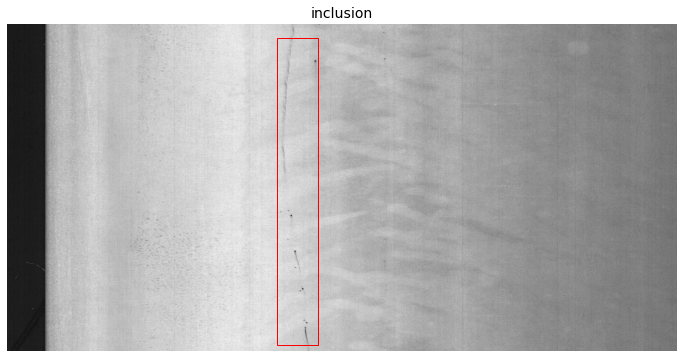

In [29]:
rand_ind = randint(0, len(images_train))

show_image(rand_ind)



In [27]:
rand_ind

1270

In [28]:
xml = open(f'{xmls_path[1042]}').read()                         
sel = etree.HTML(xml)
sel

<Element html at 0x7890cc9ec0>

In [30]:
 xmls_path[1042]

'../src/data/raw/label/label\\img_03_4402724500_01243.xml'

In [33]:
!cat ../src/data/raw/label/label\\img_03_4402724500_01243.xml

"cat" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [36]:
xmls_path[503]

'../src/data/raw/label/label\\img_02_425508300_00017.xml'

In [37]:
images_train[2124]

'../src/data/raw/images/images\\crescent_gap\\img_08_425503300_00053.jpg'

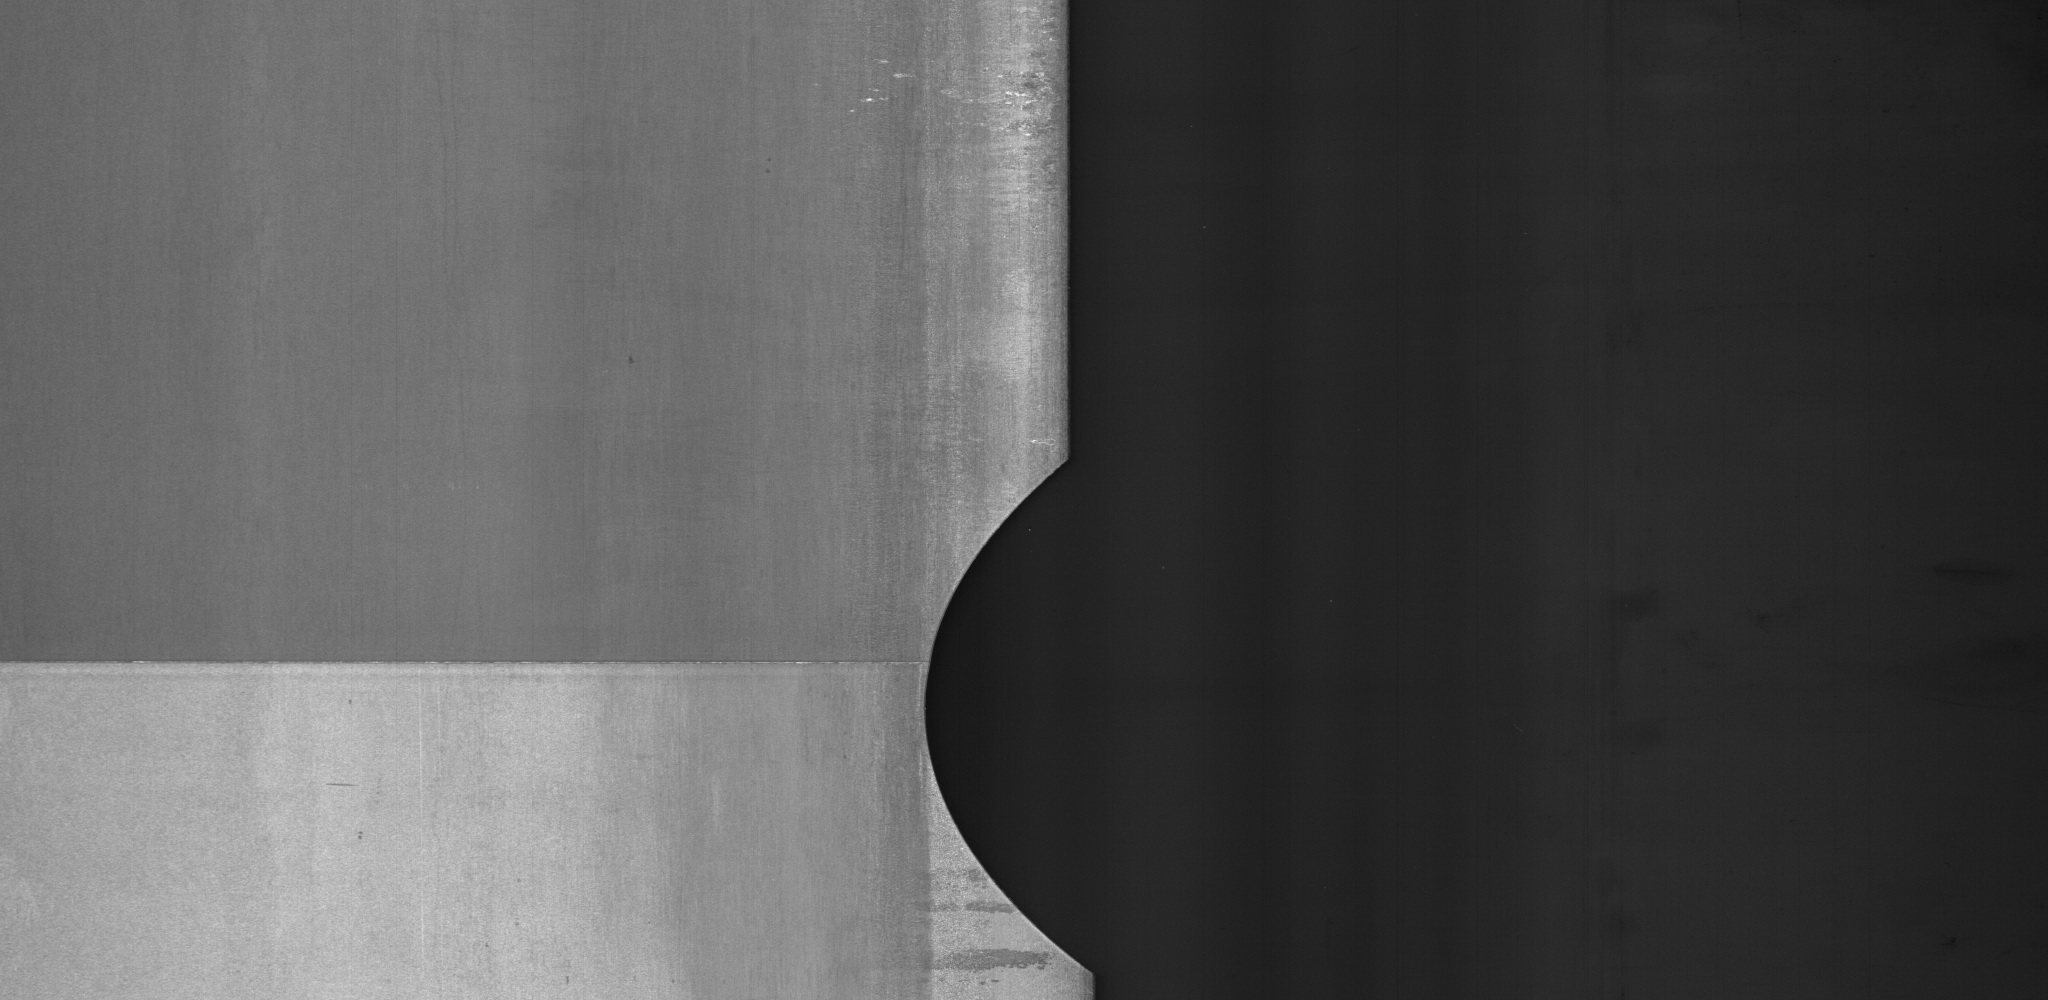

In [38]:
Img = img.open(images_train[2124])
Img

In [39]:
np_img=np.array(Img)
np_img

array([[101, 102,  99, ...,  22,  23,  24],
       [ 99, 101,  99, ...,  22,  24,  24],
       [105, 104, 100, ...,  22,  23,  23],
       ...,
       [156, 154, 157, ...,  31,  30,  30],
       [156, 158, 163, ...,  31,  31,  31],
       [154, 154, 158, ...,  30,  31,  31]], dtype=uint8)

In [40]:
np_img.shape

(1000, 2048)

In [41]:
np.sum(np_img<40)/(1000*2048)

0.37337451171875

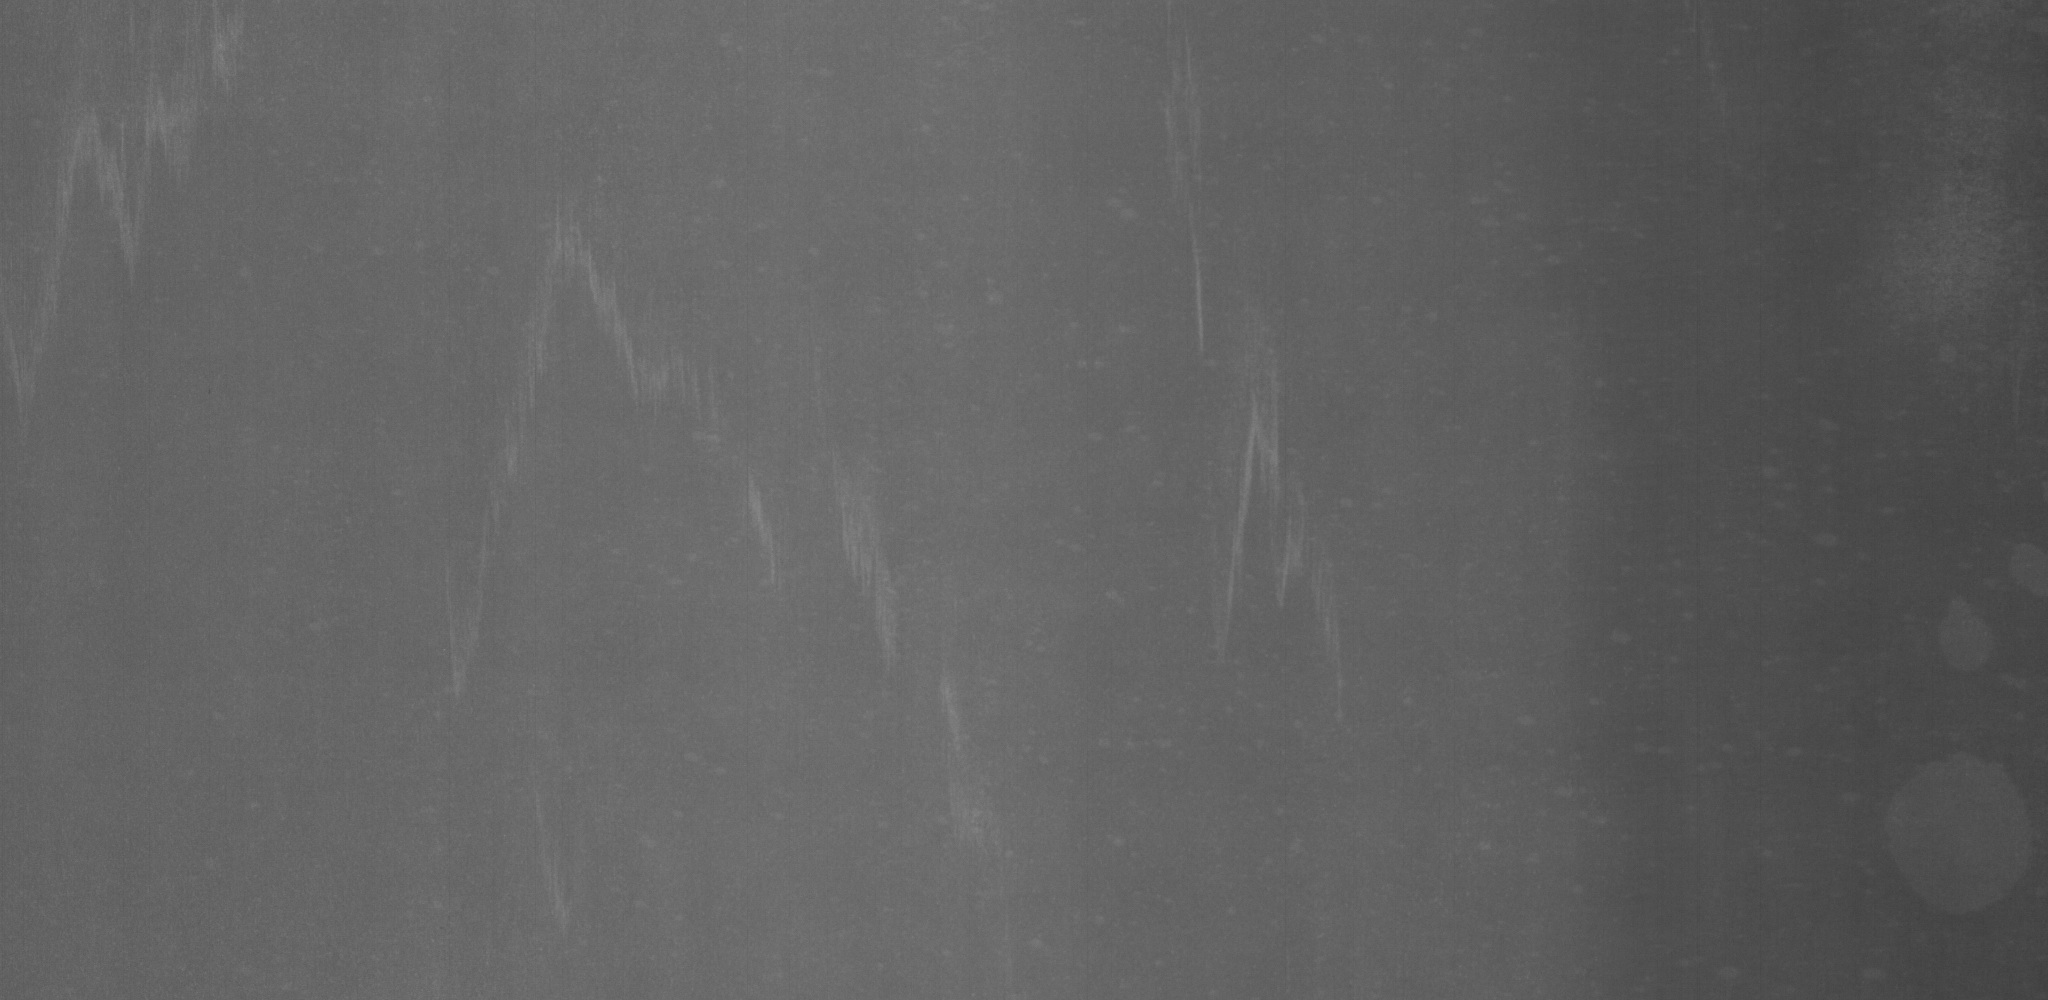

In [42]:
Img = img.open(images_train[1000])
Img

In [43]:
np_img=np.array(Img)
np.sum(np_img<40)/(1000*2048)

0.0

In [44]:
def black_count(path, treshold = 40):
    Img = img.open(path)
    np_img = np.array(Img)
    black = np.sum(np_img < treshold)/(np_img.shape[0] * np_img.shape[1])
    
    return black
    
    

In [50]:
black_distr = {}

for val in list(species_dict.values()):
    
    black_distr[val] = []
    
    for n in glob.glob(path_images + f'\\{val}\\*.jpg'):
        black_distr[val].append(black_count(n))

In [51]:
black_distr

{'punching_hole': [0.00072216796875,
  0.000994140625,
  0.0007333984375,
  0.00036767578125,
  0.00035595703125,
  0.000498046875,
  0.00031396484375,
  0.000423828125,
  0.00044921875,
  0.000419921875,
  0.00050390625,
  0.000474609375,
  0.00040966796875,
  0.0003935546875,
  0.0004384765625,
  0.000412109375,
  0.0005166015625,
  0.000455078125,
  0.00102099609375,
  0.00112939453125,
  0.001080078125,
  0.026177734375,
  0.07522119140625,
  0.056705078125,
  0.04135400390625,
  0.03483984375,
  0.001,
  0.0009833984375,
  0.00092041015625,
  0.00091064453125,
  0.00097119140625,
  0.00100048828125,
  0.00108740234375,
  0.0010361328125,
  0.00118701171875,
  0.00105029296875,
  0.00108642578125,
  0.0010537109375,
  0.0010654296875,
  0.00105517578125,
  0.0010810546875,
  0.0014609375,
  0.00104150390625,
  0.001072265625,
  0.00094384765625,
  0.00096484375,
  0.0170712890625,
  0.0027177734375,
  0.00113037109375,
  0.00094140625,
  0.0009345703125,
  0.02212158203125,
  0.033

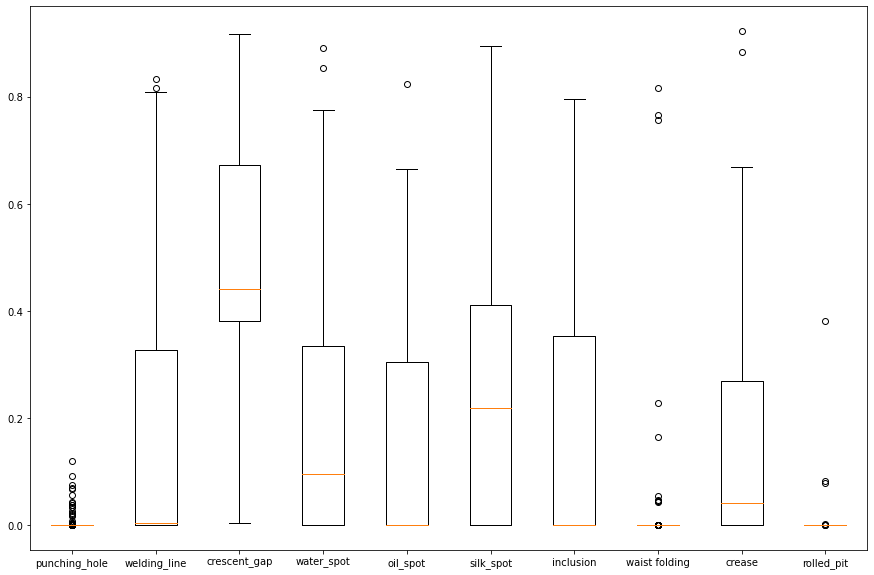

In [52]:
fig, ax = plt.subplots(figsize=(15,10))



ax.boxplot(black_distr.values())
ax.set_xticklabels(black_distr.keys())

plt.show()